In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
%matplotlib inline

In [154]:
gender_size = pd.read_csv('GenderSize.csv', index_col='years')

In [155]:
gender_size

women     men
years                
1926   1101.3  1212.4
1939   1562.6  1642.6
1959   1941.2  1756.5
1970   2634.1  2483.0
1979   3089.5  2938.8
1989   3597.4  3423.8
1999   4070.3  3883.1
2009   4508.0  4414.4

## Cleaning and Modifiying Data

### Converting from 1000 to millions

In [156]:
gender_size['women'] = gender_size['women'] * 1000
gender_size['men'] = gender_size['men'] * 1000

In [157]:
indexes_of_gender = gender_size.index.values
list_of_years = [x for x in range(1927,2008) if x not in indexes_of_gender]
extension_of_gender = pd.DataFrame(index=list_of_years, columns=gender_size.columns)
gender_size = gender_size.append(extension_of_gender)

In [158]:
gender_size.sort_index(axis=0, inplace=True)

In [159]:
gender_size = gender_size.interpolate(method='polynomial', order=2)

### Adding Total Population

In [160]:
gender_size['total_population'] = gender_size['women'] + gender_size['men']

### Adding Women and Men percentage in population

In [161]:
gender_size['men_population_percentage'] = round(gender_size['men'] / gender_size['total_population'] * 100) 
gender_size['women_population_percentage'] = round(gender_size['women'] / gender_size['total_population'] * 100) 

### Adding Increase percentage in Women and Men and Population based on previous data

In [162]:
gender_size['men_changes_percentage'] = round(gender_size['men'].pct_change() * 100,2)
gender_size['women_changes_percentage'] = round(gender_size['women'].pct_change() * 100,2)
gender_size['population_changes_percentage'] = round(gender_size['total_population'].pct_change() * 100,2)
gender_size['men_changes_percentage'] = gender_size['men_changes_percentage'].replace(np.nan, 0)
gender_size['women_changes_percentage'] = gender_size['women_changes_percentage'].replace(np.nan, 0)
gender_size['population_changes_percentage'] = gender_size['population_changes_percentage'].replace(np.nan, 0)

In [163]:
gender_size

women           men  total_population  men_population_percentage  \
1926  1.101300e+06  1.212400e+06      2.313700e+06                       52.0   
1927  1.148723e+06  1.263915e+06      2.412638e+06                       52.0   
1928  1.194156e+06  1.312359e+06      2.506515e+06                       52.0   
1929  1.237600e+06  1.357733e+06      2.595333e+06                       52.0   
1930  1.279054e+06  1.400036e+06      2.679090e+06                       52.0   
...            ...           ...               ...                        ...   
2004  4.293290e+06  4.137493e+06      8.430783e+06                       49.0   
2005  4.336894e+06  4.191073e+06      8.527967e+06                       49.0   
2006  4.380167e+06  4.245554e+06      8.625722e+06                       49.0   
2007  4.423109e+06  4.300936e+06      8.724045e+06                       49.0   
2009  4.508000e+06  4.414400e+06      8.922400e+06                       49.0   

      women_population_percentage  men_changes_percentage  \
1926                         48.0                    0.00   
1927                         48.0                    4.25   
1928                         48.0                    3.83   
1929                         48.0                    3.46   
1930                         48.0                    3.12   
...                           ...                     ...   
2004                         51.0                    1.29   
2005                         51.0                    1.29   
2006                         51.0                    1.30   
2007                         51.0                    1.30   
2009                         51.0                    2.64   

      women_changes_percentage  population_changes_percentage  
1926                      0.00                           0.00  
1927                      4.31                           4.28  
1928                      3.96                           3.89  
1929                      3.64                           3.54  
1930                      3.35                           3.23  
...                        ...                            ...  
2004                      1.03                           1.16  
2005                      1.02                           1.15  
2006                      1.00                           1.15  
2007                      0.98                           1.14  
2009                      1.92                           2.27  

[83 rows x 8 columns]

### Total Population

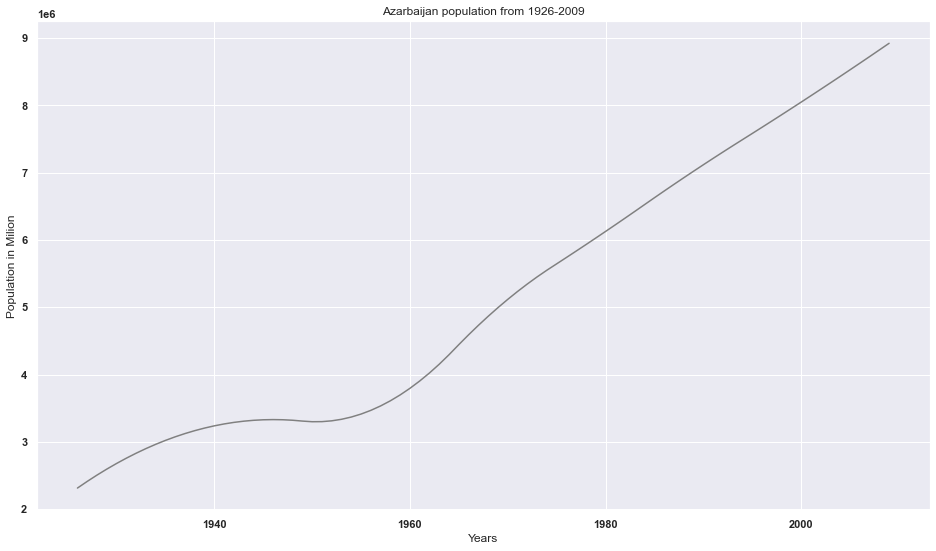

In [164]:
plt.figure(figsize=(16,9))
plt.title('Azarbaijan population from 1926-2009')
plt.ylabel('Population in Milion')
plt.xlabel('Years')
plt.plot(gender_size.index.values, gender_size['total_population'], c='grey')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 25}

plt.rc('font', **font)

### Total Women and Men Population

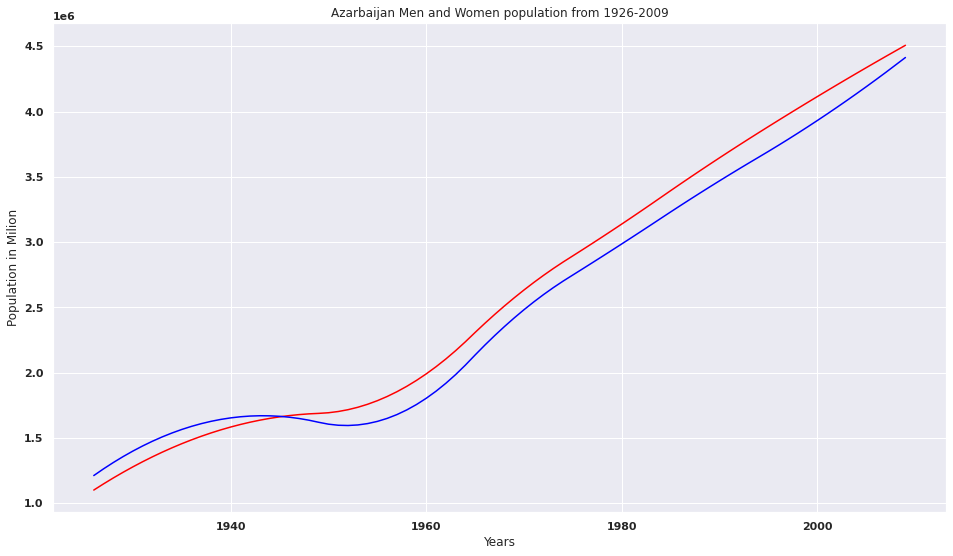

In [165]:
plt.figure(figsize=(16,9))
plt.title('Azarbaijan Men and Women population from 1926-2009')
plt.ylabel('Population in Milion')
plt.xlabel('Years')
plt.plot(gender_size.index.values, gender_size['women'], c='red')
plt.plot(gender_size.index.values, gender_size['men'], c='blue')
font = {'family' : 'normal',
        'size'   : 25}

plt.rc('font', **font)

In [189]:
gender_size

women           men  total_population  men_population_percentage  \
1926  1.101300e+06  1.212400e+06      2.313700e+06                       52.0   
1927  1.148723e+06  1.263915e+06      2.412638e+06                       52.0   
1928  1.194156e+06  1.312359e+06      2.506515e+06                       52.0   
1929  1.237600e+06  1.357733e+06      2.595333e+06                       52.0   
1930  1.279054e+06  1.400036e+06      2.679090e+06                       52.0   
...            ...           ...               ...                        ...   
2004  4.293290e+06  4.137493e+06      8.430783e+06                       49.0   
2005  4.336894e+06  4.191073e+06      8.527967e+06                       49.0   
2006  4.380167e+06  4.245554e+06      8.625722e+06                       49.0   
2007  4.423109e+06  4.300936e+06      8.724045e+06                       49.0   
2009  4.508000e+06  4.414400e+06      8.922400e+06                       49.0   

      women_population_percentage  men_changes_percentage  \
1926                         48.0                    0.00   
1927                         48.0                    4.25   
1928                         48.0                    3.83   
1929                         48.0                    3.46   
1930                         48.0                    3.12   
...                           ...                     ...   
2004                         51.0                    1.29   
2005                         51.0                    1.29   
2006                         51.0                    1.30   
2007                         51.0                    1.30   
2009                         51.0                    2.64   

      women_changes_percentage  population_changes_percentage  
1926                      0.00                           0.00  
1927                      4.31                           4.28  
1928                      3.96                           3.89  
1929                      3.64                           3.54  
1930                      3.35                           3.23  
...                        ...                            ...  
2004                      1.03                           1.16  
2005                      1.02                           1.15  
2006                      1.00                           1.15  
2007                      0.98                           1.14  
2009                      1.92                           2.27  

[83 rows x 8 columns]

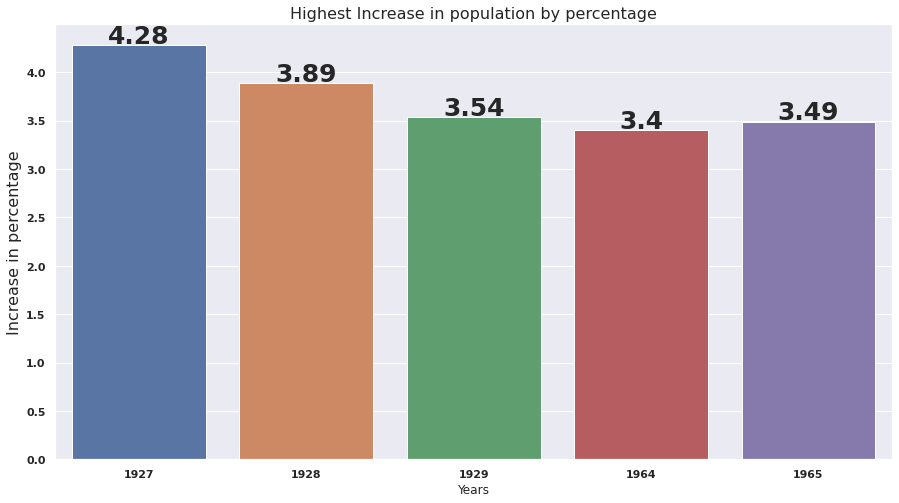

In [167]:
gender_size_sort_by_population_change = gender_size.sort_values(by='population_changes_percentage', ascending=False)
plt.figure(figsize=(15, 8))
splot = sns.barplot(x=gender_size_sort_by_population_change.index.values[0:5],
                    y=gender_size_sort_by_population_change['population_changes_percentage'].iloc[0:5])
for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel('Years',fontsize=12)
plt.ylabel('Increase in percentage', fontsize=16)
plt.title('Highest Increase in population by percentage', fontsize=16)
plt.show()

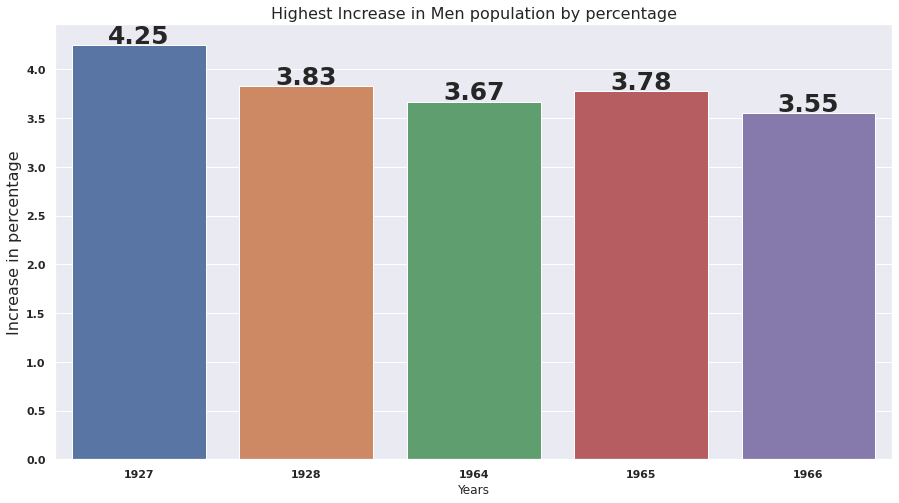

In [168]:
gender_size_sort_by_men_change = gender_size.sort_values(by='men_changes_percentage', ascending=False)
plt.figure(figsize=(15, 8))
splot = sns.barplot(x=gender_size_sort_by_men_change.index.values[0:5],
                    y=gender_size_sort_by_men_change['men_changes_percentage'].iloc[0:5])
for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel('Years',fontsize=12)
plt.ylabel('Increase in percentage', fontsize=16)
plt.title('Highest Increase in Men population by percentage', fontsize=16)
plt.show()

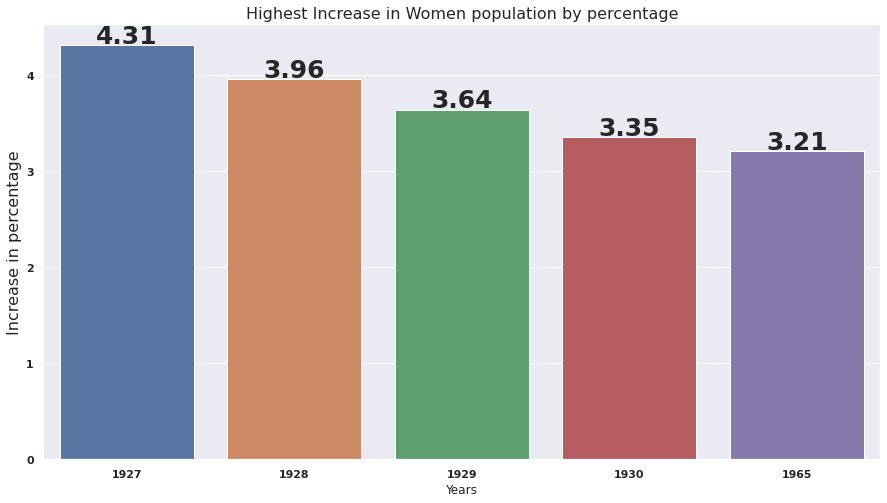

In [169]:
gender_size_sort_by_women_change = gender_size.sort_values(by='women_changes_percentage', ascending=False)
plt.figure(figsize=(15, 8))
splot = sns.barplot(x=gender_size_sort_by_women_change.index.values[0:5],
                    y=gender_size_sort_by_women_change['women_changes_percentage'].iloc[0:5])
for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel('Years',fontsize=12)
plt.ylabel('Increase in percentage', fontsize=16)
plt.title('Highest Increase in Women population by percentage', fontsize=16)
plt.show()

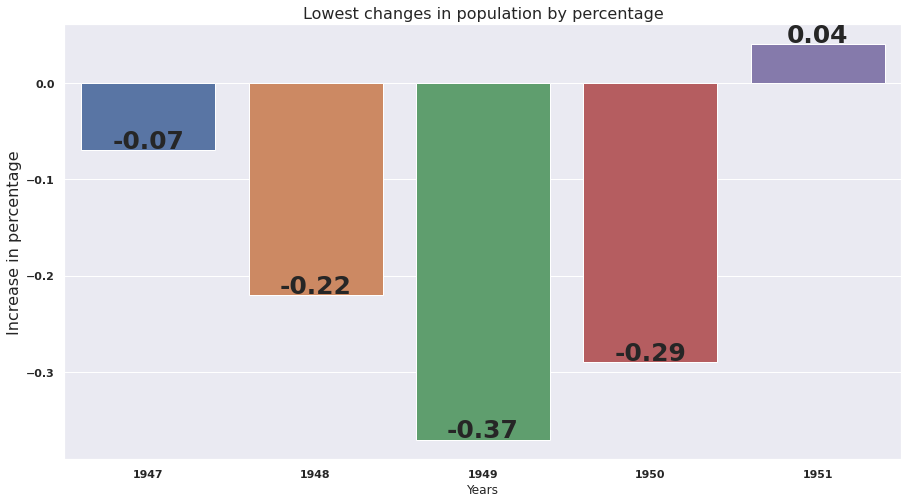

In [170]:
gender_size_sort_by_population_decrease = gender_size[gender_size['population_changes_percentage'] != 0].sort_values(by='women_changes_percentage', ascending=True)
plt.figure(figsize=(15, 8))
splot = sns.barplot(x=gender_size_sort_by_population_decrease.index.values[0:5],
                    y=gender_size_sort_by_population_decrease['population_changes_percentage'].iloc[0:5])
for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel('Years',fontsize=12)
plt.ylabel('Increase in percentage', fontsize=16)
plt.title('Lowest changes in population by percentage', fontsize=16)
plt.show()

In [179]:
death_df = pd.read_csv('death.csv').transpose()

In [187]:
death_df.head()

years    men  women  total_death  men_death_percentage  women_death_percentage
1990   22997  19822        42819                  54.0                    46.0
1991   24198  20461        44659                  54.0                    46.0
1992   28598  22660        51258                  56.0                    44.0
1993   29342  23467        52809                  56.0                    44.0
1994   31222  23699        54921                  57.0                    43.0

In [181]:
death_df.columns = death_df.iloc[0]
death_df.drop('years', inplace=True)

In [182]:
death_df['men'] = death_df['men'].astype('int')
death_df['women'] =death_df['women'].astype('int')

In [183]:
death_df['total_death'] = death_df['men'] + death_df['women']

In [184]:
death_df['men_death_percentage'] = round(death_df['men'] / death_df['total_death'] * 100)
death_df['women_death_percentage'] = 100 - death_df['men_death_percentage']

In [188]:
death_df.head()

years    men  women  total_death  men_death_percentage  women_death_percentage
1990   22997  19822        42819                  54.0                    46.0
1991   24198  20461        44659                  54.0                    46.0
1992   28598  22660        51258                  56.0                    44.0
1993   29342  23467        52809                  56.0                    44.0
1994   31222  23699        54921                  57.0                    43.0

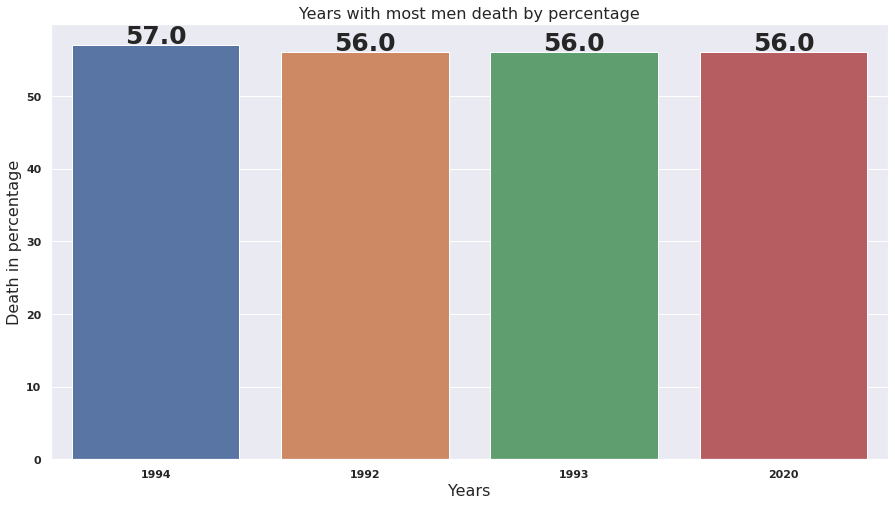

In [186]:
most_death_for_men = death_df.sort_values(by='men_death_percentage', ascending=False).iloc[:4,:]
plt.figure(figsize=(15, 8))
splot = sns.barplot(x=most_death_for_men.index.values,
                    y=most_death_for_men['men_death_percentage'])
for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel('Years',fontsize=16)
plt.ylabel('Death in percentage', fontsize=16)
plt.title('Years with most men death by percentage', fontsize=16)
plt.show()